In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv_7.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

10/04/2020 16:17:07 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 16:17:08 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 16:17:08 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 16:17:09 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 16:17:10 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

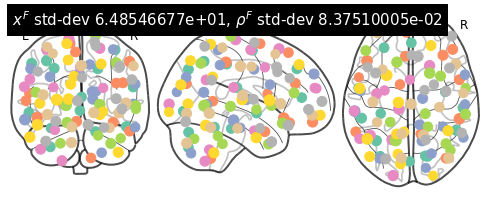

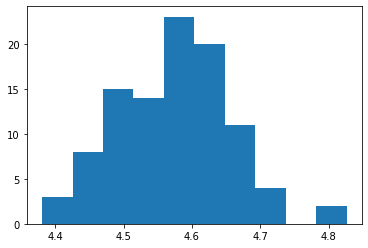

(<nilearn.plotting.displays.OrthoProjector at 0x7fb82e271dd0>,
 tensor([[-3.0789e+01, -3.0352e+01, -2.3651e+01],
         [ 3.6975e+01, -7.7002e+00,  5.8565e+01],
         [ 4.8713e+01, -4.8083e+01, -2.2233e+01],
         [-3.5396e+01, -5.8992e+01,  4.7051e+01],
         [-2.7296e+01,  3.8805e+01,  3.9206e+01],
         [ 1.4036e+00,  4.3956e+01,  8.9550e+00],
         [-3.4335e-01, -8.0776e+01, -5.2901e+00],
         [ 1.8549e+01, -7.5333e+01,  3.8710e+01],
         [-5.1021e+01, -3.5246e+01,  4.4330e+01],
         [ 5.5754e+01, -2.4335e+01,  1.9576e+01],
         [-5.4051e+01, -3.6920e+00, -7.3363e+00],
         [ 1.6285e+01, -7.5041e+01, -2.7506e+01],
         [-3.1441e+01, -7.5384e+01, -4.3456e+01],
         [ 3.4720e+01,  3.0945e+01, -1.7629e+01],
         [-1.0514e+01,  1.9664e-01,  6.5708e+01],
         [-4.9287e+00,  2.9867e+01,  5.6324e+01],
         [ 3.7904e+01, -7.7421e+01,  2.3621e+01],
         [ 4.4906e+01,  3.7091e+01,  2.3963e+01],
         [ 1.1317e+01, -5.1740e+01, -

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

464

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

10/04/2020 16:18:13 [Epoch 1] (6155ms) Posterior free-energy 8.13704141e+09 = KL from prior 1.31004690e+07 - log-likelihood -8.12394086e+09
10/04/2020 16:18:13 Saving checkpoint...
10/04/2020 16:18:19 [Epoch 2] (6062ms) Posterior free-energy 7.92345958e+09 = KL from prior 8.68884600e+06 - log-likelihood -7.91477197e+09
10/04/2020 16:18:25 [Epoch 3] (5971ms) Posterior free-energy 7.78093414e+09 = KL from prior 5.83913100e+06 - log-likelihood -7.77509478e+09
10/04/2020 16:18:31 [Epoch 4] (5913ms) Posterior free-energy 7.67633664e+09 = KL from prior 3.86343550e+06 - log-likelihood -7.67247360e+09
10/04/2020 16:18:37 [Epoch 5] (5936ms) Posterior free-energy 7.60855091e+09 = KL from prior 2.42094200e+06 - log-likelihood -7.60613069e+09
10/04/2020 16:18:43 [Epoch 6] (5991ms) Posterior free-energy 7.54962893e+09 = KL from prior 1.48846938e+06 - log-likelihood -7.54814054e+09
10/04/2020 16:18:49 [Epoch 7] (5924ms) Posterior free-energy 7.50437990e+09 = KL from prior 1.07631225e+06 - log-likeli

Epoch   387: reducing learning rate of group 0 to 5.0000e-03.
Epoch   387: reducing learning rate of group 1 to 5.0000e-04.
Epoch   387: reducing learning rate of group 2 to 5.0000e-03.
Epoch   387: reducing learning rate of group 3 to 5.0000e-04.


10/04/2020 16:57:13 [Epoch 388] (6059ms) Posterior free-energy 5.23596902e+09 = KL from prior 1.62651100e+06 - log-likelihood -5.23434138e+09
10/04/2020 16:57:19 [Epoch 389] (6018ms) Posterior free-energy 5.20636570e+09 = KL from prior 1.61991300e+06 - log-likelihood -5.20474624e+09
10/04/2020 16:57:25 [Epoch 390] (6025ms) Posterior free-energy 5.20500378e+09 = KL from prior 1.61928362e+06 - log-likelihood -5.20338381e+09
10/04/2020 16:57:31 [Epoch 391] (6024ms) Posterior free-energy 5.20418202e+09 = KL from prior 1.61516925e+06 - log-likelihood -5.20256717e+09
10/04/2020 16:57:37 [Epoch 392] (6020ms) Posterior free-energy 5.20385331e+09 = KL from prior 1.61929112e+06 - log-likelihood -5.20223437e+09
10/04/2020 16:57:43 [Epoch 393] (5984ms) Posterior free-energy 5.20334694e+09 = KL from prior 1.62169012e+06 - log-likelihood -5.20172493e+09
10/04/2020 16:57:49 [Epoch 394] (6001ms) Posterior free-energy 5.20315904e+09 = KL from prior 1.61834888e+06 - log-likelihood -5.20154163e+09
10/04/

Epoch   589: reducing learning rate of group 0 to 2.5000e-03.
Epoch   589: reducing learning rate of group 1 to 2.5000e-04.
Epoch   589: reducing learning rate of group 2 to 2.5000e-03.
Epoch   589: reducing learning rate of group 3 to 2.5000e-04.


10/04/2020 17:17:35 [Epoch 590] (6088ms) Posterior free-energy 5.18227046e+09 = KL from prior 1.66519275e+06 - log-likelihood -5.18060544e+09
10/04/2020 17:17:41 [Epoch 591] (6092ms) Posterior free-energy 5.18074317e+09 = KL from prior 1.66291575e+06 - log-likelihood -5.17908122e+09
10/04/2020 17:17:47 [Epoch 592] (6050ms) Posterior free-energy 5.18049690e+09 = KL from prior 1.66010650e+06 - log-likelihood -5.17883546e+09
10/04/2020 17:17:53 [Epoch 593] (6079ms) Posterior free-energy 5.18034074e+09 = KL from prior 1.66393712e+06 - log-likelihood -5.17867674e+09
10/04/2020 17:17:59 [Epoch 594] (6056ms) Posterior free-energy 5.18027110e+09 = KL from prior 1.65971175e+06 - log-likelihood -5.17861171e+09
10/04/2020 17:18:05 [Epoch 595] (6033ms) Posterior free-energy 5.18003917e+09 = KL from prior 1.65891275e+06 - log-likelihood -5.17837875e+09
10/04/2020 17:18:11 [Epoch 596] (6082ms) Posterior free-energy 5.17993114e+09 = KL from prior 1.66041100e+06 - log-likelihood -5.17827021e+09
10/04/

Epoch   749: reducing learning rate of group 0 to 1.2500e-03.
Epoch   749: reducing learning rate of group 1 to 1.2500e-04.
Epoch   749: reducing learning rate of group 2 to 1.2500e-03.
Epoch   749: reducing learning rate of group 3 to 1.2500e-04.


10/04/2020 17:33:46 [Epoch 750] (5985ms) Posterior free-energy 5.17482240e+09 = KL from prior 1.68908750e+06 - log-likelihood -5.17313331e+09
10/04/2020 17:33:52 [Epoch 751] (6004ms) Posterior free-energy 5.17467085e+09 = KL from prior 1.68129875e+06 - log-likelihood -5.17298995e+09
10/04/2020 17:33:58 [Epoch 752] (5975ms) Posterior free-energy 5.17467904e+09 = KL from prior 1.67869162e+06 - log-likelihood -5.17299968e+09
10/04/2020 17:34:04 [Epoch 753] (6006ms) Posterior free-energy 5.17453926e+09 = KL from prior 1.68235662e+06 - log-likelihood -5.17285530e+09
10/04/2020 17:34:10 [Epoch 754] (6002ms) Posterior free-energy 5.17446912e+09 = KL from prior 1.68254900e+06 - log-likelihood -5.17278720e+09
10/04/2020 17:34:17 [Epoch 755] (6172ms) Posterior free-energy 5.17439130e+09 = KL from prior 1.68254788e+06 - log-likelihood -5.17270835e+09
10/04/2020 17:34:23 [Epoch 756] (6143ms) Posterior free-energy 5.17447834e+09 = KL from prior 1.68188488e+06 - log-likelihood -5.17279642e+09
10/04/

Epoch   778: reducing learning rate of group 0 to 6.2500e-04.
Epoch   778: reducing learning rate of group 1 to 6.2500e-05.
Epoch   778: reducing learning rate of group 2 to 6.2500e-04.
Epoch   778: reducing learning rate of group 3 to 6.2500e-05.


10/04/2020 17:36:41 [Epoch 779] (6007ms) Posterior free-energy 5.17397197e+09 = KL from prior 1.67968262e+06 - log-likelihood -5.17229261e+09
10/04/2020 17:36:47 [Epoch 780] (6049ms) Posterior free-energy 5.17389312e+09 = KL from prior 1.67708962e+06 - log-likelihood -5.17221683e+09
10/04/2020 17:36:54 [Epoch 781] (6131ms) Posterior free-energy 5.17372774e+09 = KL from prior 1.67951488e+06 - log-likelihood -5.17204838e+09
10/04/2020 17:37:00 [Epoch 782] (6217ms) Posterior free-energy 5.17379277e+09 = KL from prior 1.68434875e+06 - log-likelihood -5.17210829e+09
10/04/2020 17:37:06 [Epoch 783] (6204ms) Posterior free-energy 5.17383885e+09 = KL from prior 1.68248588e+06 - log-likelihood -5.17215744e+09
10/04/2020 17:37:12 [Epoch 784] (6147ms) Posterior free-energy 5.17374054e+09 = KL from prior 1.67934438e+06 - log-likelihood -5.17206221e+09
10/04/2020 17:37:18 [Epoch 785] (6075ms) Posterior free-energy 5.17367706e+09 = KL from prior 1.68237075e+06 - log-likelihood -5.17199462e+09
10/04/

Epoch   802: reducing learning rate of group 0 to 3.1250e-04.
Epoch   802: reducing learning rate of group 1 to 3.1250e-05.
Epoch   802: reducing learning rate of group 2 to 3.1250e-04.
Epoch   802: reducing learning rate of group 3 to 3.1250e-05.


10/04/2020 17:39:08 [Epoch 803] (6188ms) Posterior free-energy 5.17363405e+09 = KL from prior 1.68005400e+06 - log-likelihood -5.17195366e+09
10/04/2020 17:39:14 [Epoch 804] (6202ms) Posterior free-energy 5.17360538e+09 = KL from prior 1.67953500e+06 - log-likelihood -5.17192499e+09
10/04/2020 17:39:20 [Epoch 805] (6113ms) Posterior free-energy 5.17358746e+09 = KL from prior 1.67972625e+06 - log-likelihood -5.17190861e+09
10/04/2020 17:39:26 [Epoch 806] (6089ms) Posterior free-energy 5.17354342e+09 = KL from prior 1.67928338e+06 - log-likelihood -5.17186458e+09
10/04/2020 17:39:32 [Epoch 807] (6091ms) Posterior free-energy 5.17342003e+09 = KL from prior 1.67999050e+06 - log-likelihood -5.17174016e+09
10/04/2020 17:39:38 [Epoch 808] (6099ms) Posterior free-energy 5.17346458e+09 = KL from prior 1.68212375e+06 - log-likelihood -5.17178266e+09
10/04/2020 17:39:44 [Epoch 809] (6069ms) Posterior free-energy 5.17347635e+09 = KL from prior 1.67958588e+06 - log-likelihood -5.17179648e+09
10/04/

Epoch   823: reducing learning rate of group 0 to 1.5625e-04.
Epoch   823: reducing learning rate of group 1 to 1.5625e-05.
Epoch   823: reducing learning rate of group 2 to 1.5625e-04.
Epoch   823: reducing learning rate of group 3 to 1.5625e-05.


10/04/2020 17:41:15 [Epoch 824] (6039ms) Posterior free-energy 5.17333709e+09 = KL from prior 1.68570988e+06 - log-likelihood -5.17165107e+09
10/04/2020 17:41:21 [Epoch 825] (6010ms) Posterior free-energy 5.17332787e+09 = KL from prior 1.68018925e+06 - log-likelihood -5.17164646e+09
10/04/2020 17:41:27 [Epoch 826] (6022ms) Posterior free-energy 5.17336422e+09 = KL from prior 1.67806138e+06 - log-likelihood -5.17168538e+09
10/04/2020 17:41:33 [Epoch 827] (6006ms) Posterior free-energy 5.17340570e+09 = KL from prior 1.68236275e+06 - log-likelihood -5.17172326e+09
10/04/2020 17:41:39 [Epoch 828] (6009ms) Posterior free-energy 5.17324646e+09 = KL from prior 1.68009212e+06 - log-likelihood -5.17156557e+09
10/04/2020 17:41:45 [Epoch 829] (6045ms) Posterior free-energy 5.17338726e+09 = KL from prior 1.67943075e+06 - log-likelihood -5.17170739e+09
10/04/2020 17:41:51 [Epoch 830] (6043ms) Posterior free-energy 5.17325670e+09 = KL from prior 1.68059588e+06 - log-likelihood -5.17157683e+09
10/04/

Epoch   865: reducing learning rate of group 0 to 7.8125e-05.
Epoch   865: reducing learning rate of group 1 to 1.0000e-05.
Epoch   865: reducing learning rate of group 2 to 7.8125e-05.
Epoch   865: reducing learning rate of group 3 to 1.0000e-05.


10/04/2020 17:45:32 [Epoch 866] (6076ms) Posterior free-energy 5.17327616e+09 = KL from prior 1.67748000e+06 - log-likelihood -5.17159987e+09
10/04/2020 17:45:38 [Epoch 867] (6109ms) Posterior free-energy 5.17317683e+09 = KL from prior 1.67958538e+06 - log-likelihood -5.17149645e+09
10/04/2020 17:45:44 [Epoch 868] (6085ms) Posterior free-energy 5.17321574e+09 = KL from prior 1.68217700e+06 - log-likelihood -5.17153434e+09
10/04/2020 17:45:50 [Epoch 869] (6060ms) Posterior free-energy 5.17326592e+09 = KL from prior 1.68045950e+06 - log-likelihood -5.17158451e+09
10/04/2020 17:45:56 [Epoch 870] (6041ms) Posterior free-energy 5.17317939e+09 = KL from prior 1.68070600e+06 - log-likelihood -5.17150003e+09
10/04/2020 17:46:02 [Epoch 871] (6071ms) Posterior free-energy 5.17316147e+09 = KL from prior 1.68012888e+06 - log-likelihood -5.17148160e+09
10/04/2020 17:46:08 [Epoch 872] (6067ms) Posterior free-energy 5.17323827e+09 = KL from prior 1.67988088e+06 - log-likelihood -5.17155789e+09
10/04/

Epoch   886: reducing learning rate of group 0 to 3.9063e-05.
Epoch   886: reducing learning rate of group 2 to 3.9063e-05.


10/04/2020 17:47:40 [Epoch 887] (6097ms) Posterior free-energy 5.17322445e+09 = KL from prior 1.68314538e+06 - log-likelihood -5.17154150e+09
10/04/2020 17:47:46 [Epoch 888] (6099ms) Posterior free-energy 5.17320602e+09 = KL from prior 1.68020112e+06 - log-likelihood -5.17152614e+09
10/04/2020 17:47:52 [Epoch 889] (6041ms) Posterior free-energy 5.17325824e+09 = KL from prior 1.67729262e+06 - log-likelihood -5.17158093e+09
10/04/2020 17:47:58 [Epoch 890] (6048ms) Posterior free-energy 5.17311283e+09 = KL from prior 1.68264112e+06 - log-likelihood -5.17143040e+09
10/04/2020 17:48:04 [Epoch 891] (6099ms) Posterior free-energy 5.17324442e+09 = KL from prior 1.67819250e+06 - log-likelihood -5.17156608e+09
10/04/2020 17:48:10 [Epoch 892] (6074ms) Posterior free-energy 5.17330074e+09 = KL from prior 1.68014175e+06 - log-likelihood -5.17162138e+09
10/04/2020 17:48:16 [Epoch 893] (6096ms) Posterior free-energy 5.17326490e+09 = KL from prior 1.68076550e+06 - log-likelihood -5.17158400e+09
10/04/

Epoch   907: reducing learning rate of group 0 to 1.9531e-05.
Epoch   907: reducing learning rate of group 2 to 1.9531e-05.


10/04/2020 17:49:47 [Epoch 908] (6087ms) Posterior free-energy 5.17315942e+09 = KL from prior 1.68121462e+06 - log-likelihood -5.17147853e+09
10/04/2020 17:49:53 [Epoch 909] (6064ms) Posterior free-energy 5.17323110e+09 = KL from prior 1.68218588e+06 - log-likelihood -5.17154867e+09
10/04/2020 17:49:59 [Epoch 910] (6038ms) Posterior free-energy 5.17316198e+09 = KL from prior 1.68288112e+06 - log-likelihood -5.17147904e+09
10/04/2020 17:50:05 [Epoch 911] (6041ms) Posterior free-energy 5.17311027e+09 = KL from prior 1.68103375e+06 - log-likelihood -5.17142938e+09
10/04/2020 17:50:11 [Epoch 912] (6048ms) Posterior free-energy 5.17317171e+09 = KL from prior 1.68001175e+06 - log-likelihood -5.17149184e+09
10/04/2020 17:50:17 [Epoch 913] (6057ms) Posterior free-energy 5.17316608e+09 = KL from prior 1.67928350e+06 - log-likelihood -5.17148774e+09
10/04/2020 17:50:24 [Epoch 914] (6077ms) Posterior free-energy 5.17317888e+09 = KL from prior 1.67806812e+06 - log-likelihood -5.17150054e+09
10/04/

Epoch   928: reducing learning rate of group 0 to 1.0000e-05.
Epoch   928: reducing learning rate of group 2 to 1.0000e-05.


10/04/2020 17:51:55 [Epoch 929] (6054ms) Posterior free-energy 5.17310003e+09 = KL from prior 1.68313112e+06 - log-likelihood -5.17141760e+09
10/04/2020 17:52:01 [Epoch 930] (6110ms) Posterior free-energy 5.17309389e+09 = KL from prior 1.68099462e+06 - log-likelihood -5.17141299e+09
10/04/2020 17:52:07 [Epoch 931] (6093ms) Posterior free-energy 5.17320397e+09 = KL from prior 1.68074738e+06 - log-likelihood -5.17152512e+09
10/04/2020 17:52:13 [Epoch 932] (6090ms) Posterior free-energy 5.17310362e+09 = KL from prior 1.67788562e+06 - log-likelihood -5.17142426e+09
10/04/2020 17:52:19 [Epoch 933] (6088ms) Posterior free-energy 5.17318707e+09 = KL from prior 1.67940838e+06 - log-likelihood -5.17150566e+09
10/04/2020 17:52:25 [Epoch 934] (6051ms) Posterior free-energy 5.17326746e+09 = KL from prior 1.68033538e+06 - log-likelihood -5.17158758e+09
10/04/2020 17:52:32 [Epoch 935] (6085ms) Posterior free-energy 5.17324339e+09 = KL from prior 1.68196150e+06 - log-likelihood -5.17156147e+09
10/04/

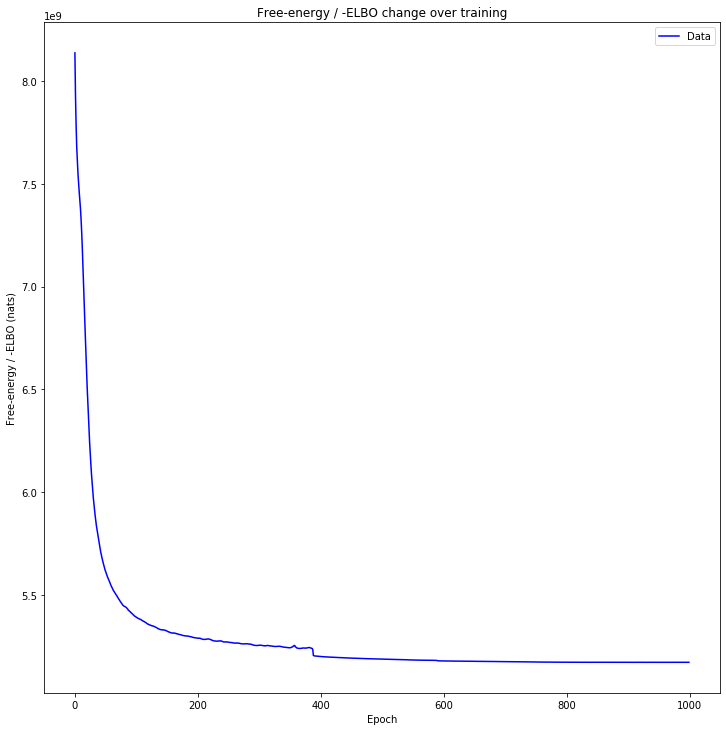

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

10/04/2020 17:59:12 [Epoch 1] (696ms) Posterior free-energy 1.26135770e+09 = KL from prior 9.26533984e+04 - log-likelihood -1.26126502e+09
10/04/2020 17:59:12 Saving checkpoint...
10/04/2020 17:59:13 [Epoch 2] (704ms) Posterior free-energy 1.22869018e+09 = KL from prior 9.44387578e+04 - log-likelihood -1.22859571e+09
10/04/2020 17:59:13 [Epoch 3] (703ms) Posterior free-energy 1.20464294e+09 = KL from prior 8.73571875e+04 - log-likelihood -1.20455565e+09
10/04/2020 17:59:14 [Epoch 4] (700ms) Posterior free-energy 1.18127168e+09 = KL from prior 8.60274219e+04 - log-likelihood -1.18118566e+09
10/04/2020 17:59:15 [Epoch 5] (699ms) Posterior free-energy 1.16399629e+09 = KL from prior 8.48098438e+04 - log-likelihood -1.16391142e+09
10/04/2020 17:59:15 [Epoch 6] (699ms) Posterior free-energy 1.13704397e+09 = KL from prior 8.33847031e+04 - log-likelihood -1.13696064e+09
10/04/2020 17:59:16 [Epoch 7] (695ms) Posterior free-energy 1.12627712e+09 = KL from prior 8.23804375e+04 - log-likelihood -1

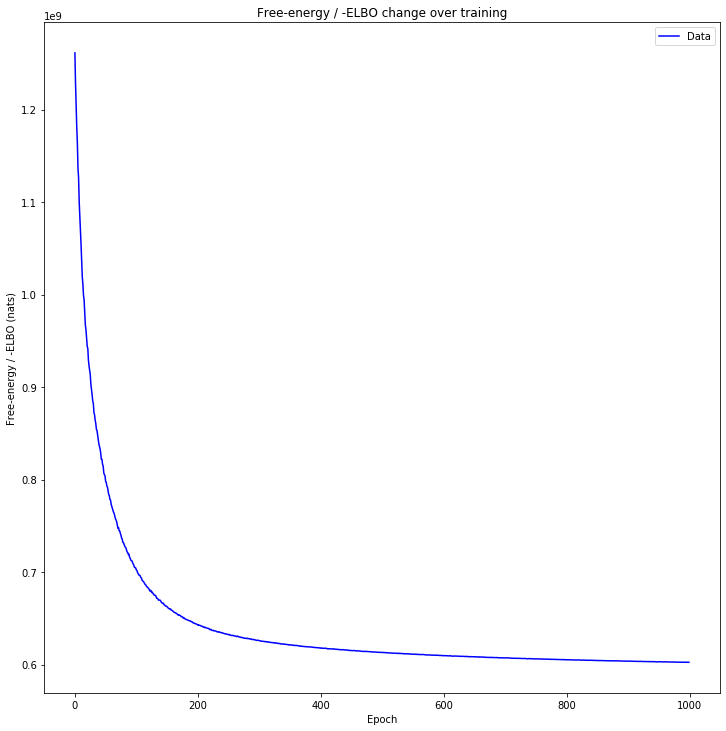

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

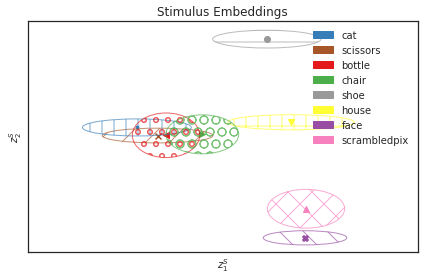

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

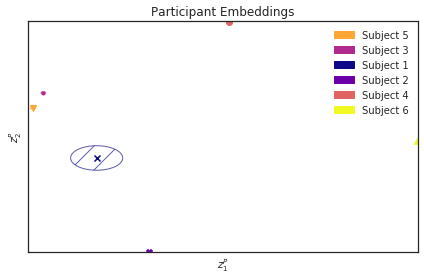

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

10/04/2020 18:10:56 Plotting factors for Participant 6, run 9


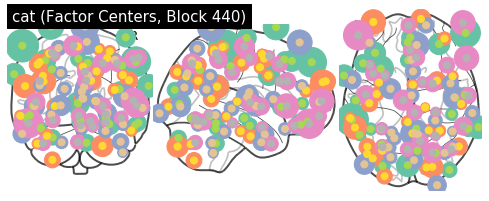

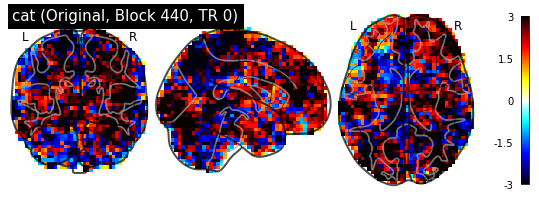

10/04/2020 18:10:58 Reconstruction Error (Frobenius Norm): 1.32206818e+02 out of 6.75934509e+02


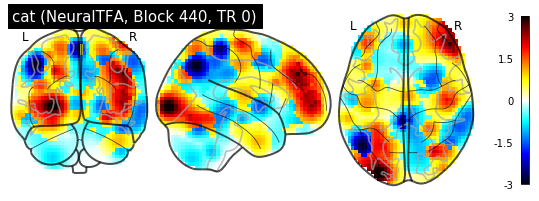

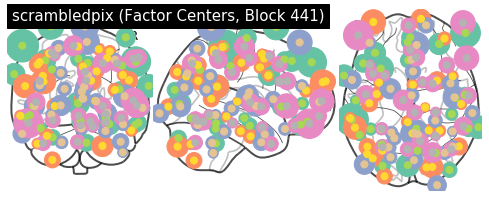

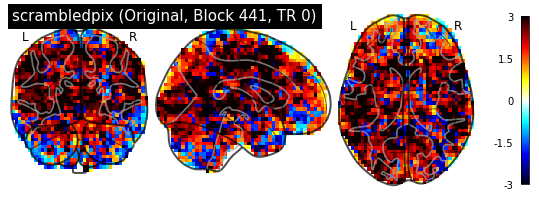

10/04/2020 18:11:01 Reconstruction Error (Frobenius Norm): 1.33650604e+02 out of 7.11275513e+02


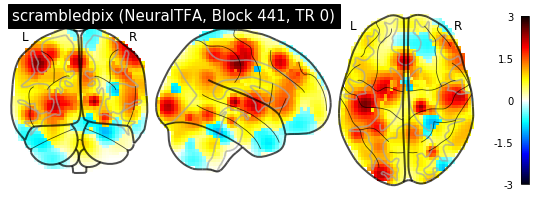

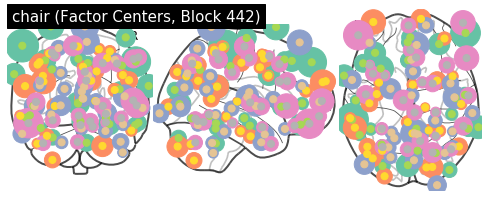

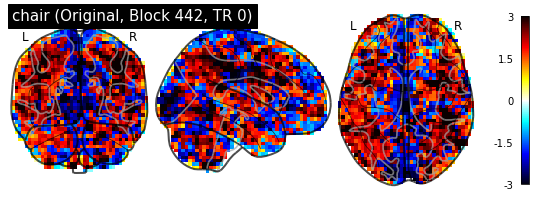

10/04/2020 18:11:04 Reconstruction Error (Frobenius Norm): 1.34052338e+02 out of 5.98339600e+02


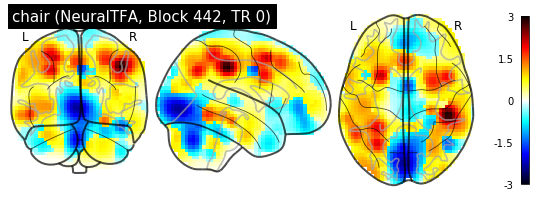

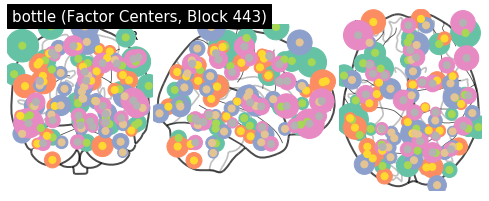

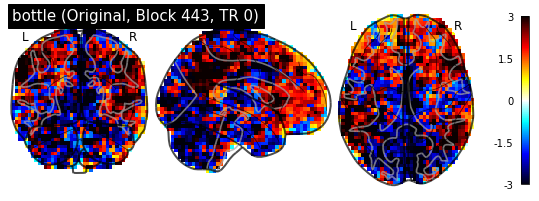

10/04/2020 18:11:07 Reconstruction Error (Frobenius Norm): 1.35390915e+02 out of 6.03638428e+02


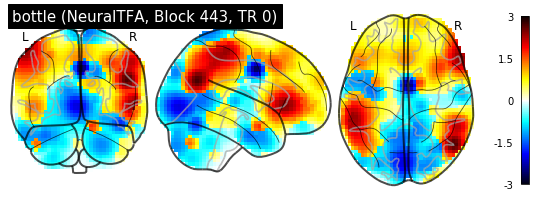

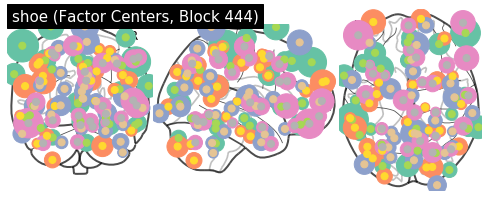

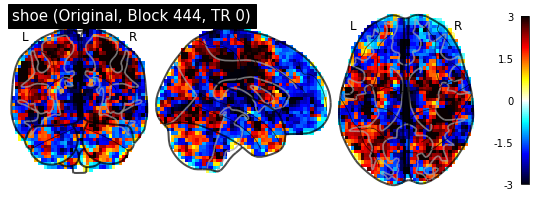

10/04/2020 18:11:10 Reconstruction Error (Frobenius Norm): 1.13857513e+02 out of 5.99131042e+02


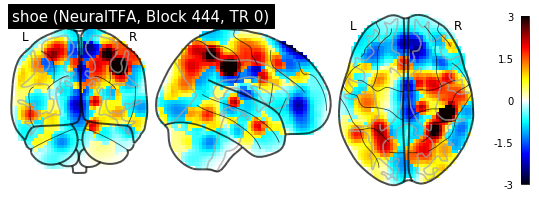

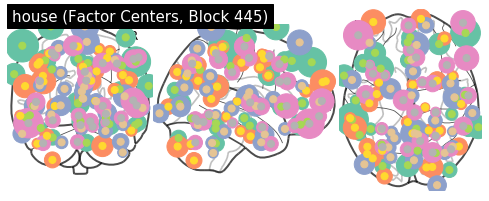

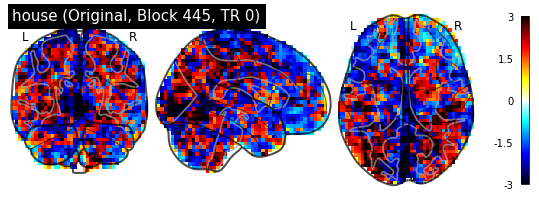

10/04/2020 18:11:13 Reconstruction Error (Frobenius Norm): 1.14258293e+02 out of 5.96572083e+02


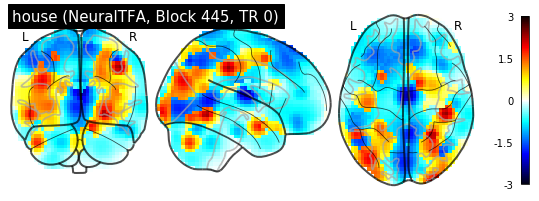

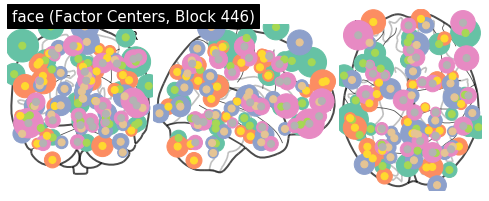

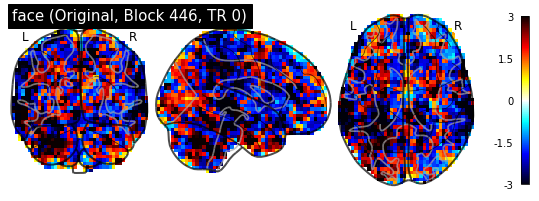

10/04/2020 18:11:16 Reconstruction Error (Frobenius Norm): 1.16438225e+02 out of 5.69438416e+02


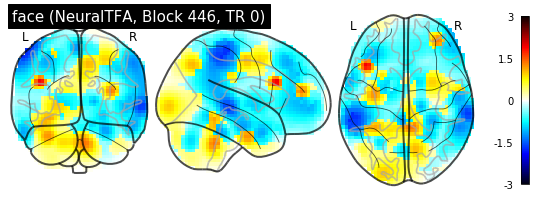

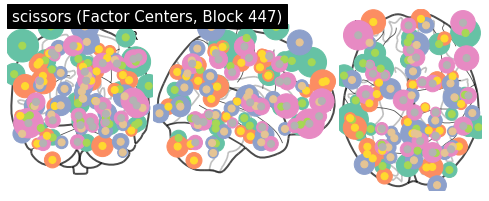

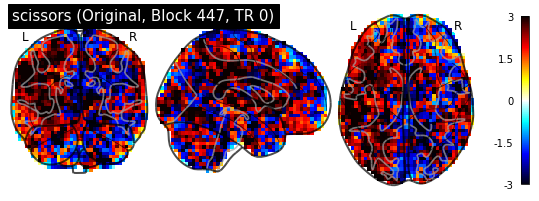

10/04/2020 18:11:19 Reconstruction Error (Frobenius Norm): 1.55804489e+02 out of 6.32129272e+02


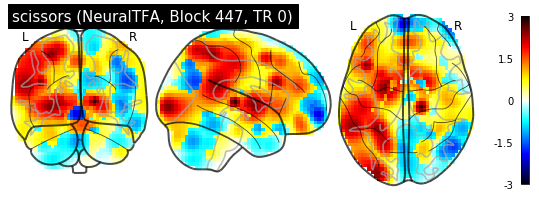

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

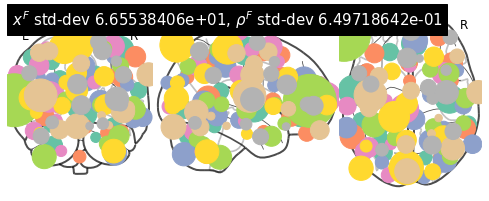

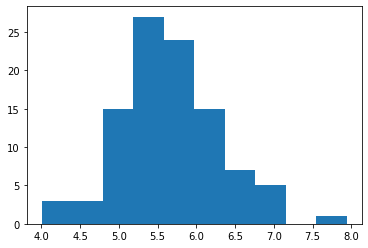

(<nilearn.plotting.displays.OrthoProjector at 0x7fb7f4087a10>,
 tensor([[-31.2265, -47.9375, -20.9568],
         [ 41.6469, -15.1782,  58.0683],
         [ 35.4100, -63.4483, -21.7407],
         [-29.9858, -58.4942,  46.2394],
         [-21.3544,  34.2739,  27.5042],
         [  4.3648,  43.1208,  -8.4528],
         [ -3.1273, -80.9098,  -3.3672],
         [ 16.5047, -76.4043,  34.7203],
         [-51.3750, -37.8561,  50.5307],
         [ 61.3330, -41.4705,  15.7963],
         [-59.4391,  -6.3200,  -0.6452],
         [ 16.3997, -79.1623, -33.5165],
         [-28.1920, -71.4658, -41.7954],
         [ 30.0187,  49.1807, -28.4970],
         [ -0.4429,   3.8923,  53.9680],
         [ -1.0223,  22.5340,  53.7204],
         [ 31.9707, -76.6940,  30.9523],
         [ 44.3941,  22.8810,  29.6991],
         [ -0.5911, -56.0787, -53.7460],
         [-60.7494, -54.6814,   8.4288],
         [ 43.5656,   4.0099, -27.5309],
         [-37.4291,  32.9068, -11.1917],
         [ 58.1217, -46.0162,  51.3

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

10/04/2020 18:11:29 Average reconstruction error (MSE): 5.21613797e+02 +/- 4.20466980e+01
10/04/2020 18:11:29 Average data norm (Euclidean): 6.03440697e+02 +/- 6.25894650e+01
10/04/2020 18:11:29 Percent average reconstruction error: 86.712623 +/- 3.98332084e+00


(array([557.24304199, 533.61560059, 499.35162354, 507.49160767,
        524.66223145, 507.43743896, 511.58132935, 486.89572144,
        554.62036133, 526.95098877, 498.9861145 , 450.2071228 ,
        469.70352173, 488.51870728, 546.74414062, 540.7208252 ,
        500.11502075, 496.76504517, 468.78970337, 500.45028687,
        477.59597778, 532.54833984, 500.13208008, 509.61416626,
        613.97198486, 547.96435547, 506.27890015, 532.15026855,
        476.32580566, 511.64703369, 514.574646  , 476.8006897 ,
        585.14550781, 523.32080078, 466.35778809, 492.96966553,
        528.98632812, 490.9385376 , 505.66714478, 539.97839355,
        594.14837646, 500.42315674, 496.68621826, 520.32281494,
        525.5012207 , 508.92074585, 543.50158691, 491.30545044,
        454.52108765, 450.18041992, 467.27529907, 448.94488525,
        465.51287842, 465.74688721, 431.24176025, 495.87896729,
        505.08453369, 460.24264526, 410.08114624, 437.12744141,
        459.69143677, 455.2696228 , 461.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[602463744.0, -602321408.0, 142278.640625],
 [602615232.0, -602193792.0, 142753.21875]]